# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Business Objective:
In earlier days, when all cars were gas or diesel driven, there was enough experience among the staff to determine what cars would sell at a high price. With the introduction of hybrid and electric vehicles and autonomous features, there are different factors that influence the used car sale. Data science can see hidden patterns and provide a better way to determine the factors that drive sale price and help the business make more profits. The objectives for this data science project are:
1. Predict sale price of used car that is yet to be procured by the business
2. The prediction accuracy should be 90% or higher to be deployed
3. Educate on what factors drive the sale price for different category of vehicles.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1071]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector, RFE, SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer

from sklearn import set_config
import warnings
warnings.filterwarnings('ignore')

In [1072]:
used_cars = pd.read_csv("data//vehicles.csv")
used_cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [1073]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [1074]:
used_cars.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

#### There are quite a number of columns with significant number of  NaN values
Options:
1. Drop all NaN rows
2. Try to fill as much NaN as possible

In [1075]:
df = used_cars.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34868 entries, 126 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34868 non-null  int64  
 1   region        34868 non-null  object 
 2   price         34868 non-null  int64  
 3   year          34868 non-null  float64
 4   manufacturer  34868 non-null  object 
 5   model         34868 non-null  object 
 6   condition     34868 non-null  object 
 7   cylinders     34868 non-null  object 
 8   fuel          34868 non-null  object 
 9   odometer      34868 non-null  float64
 10  title_status  34868 non-null  object 
 11  transmission  34868 non-null  object 
 12  VIN           34868 non-null  object 
 13  drive         34868 non-null  object 
 14  size          34868 non-null  object 
 15  type          34868 non-null  object 
 16  paint_color   34868 non-null  object 
 17  state         34868 non-null  object 
dtypes: float64(2), int64(2), obj

#### Dropping all NaN rows results in significant reduction in number of entries. Have to choose between dropping all versus filling

In [1076]:
used_cars.duplicated().sum()

0

#### No duplicates found 

In [1077]:
type(used_cars[['size']].iloc[0,0])

float

#### Columns which say type as 'object' are not string and need to be converted to string

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'odometer'}>]], dtype=object)

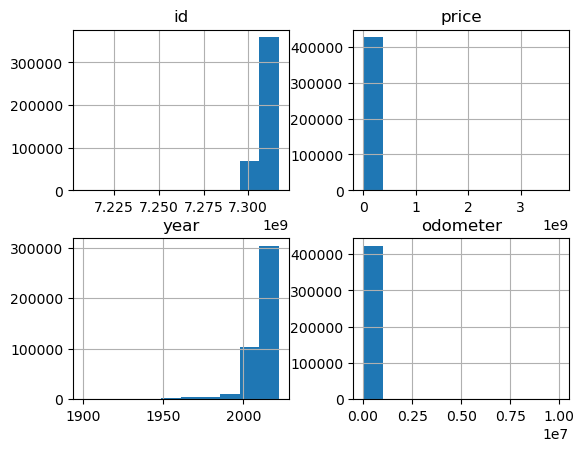

In [1078]:
used_cars.hist()

#### Existing numerical columns have skewed distribution, they need to be normalized

<Axes: >

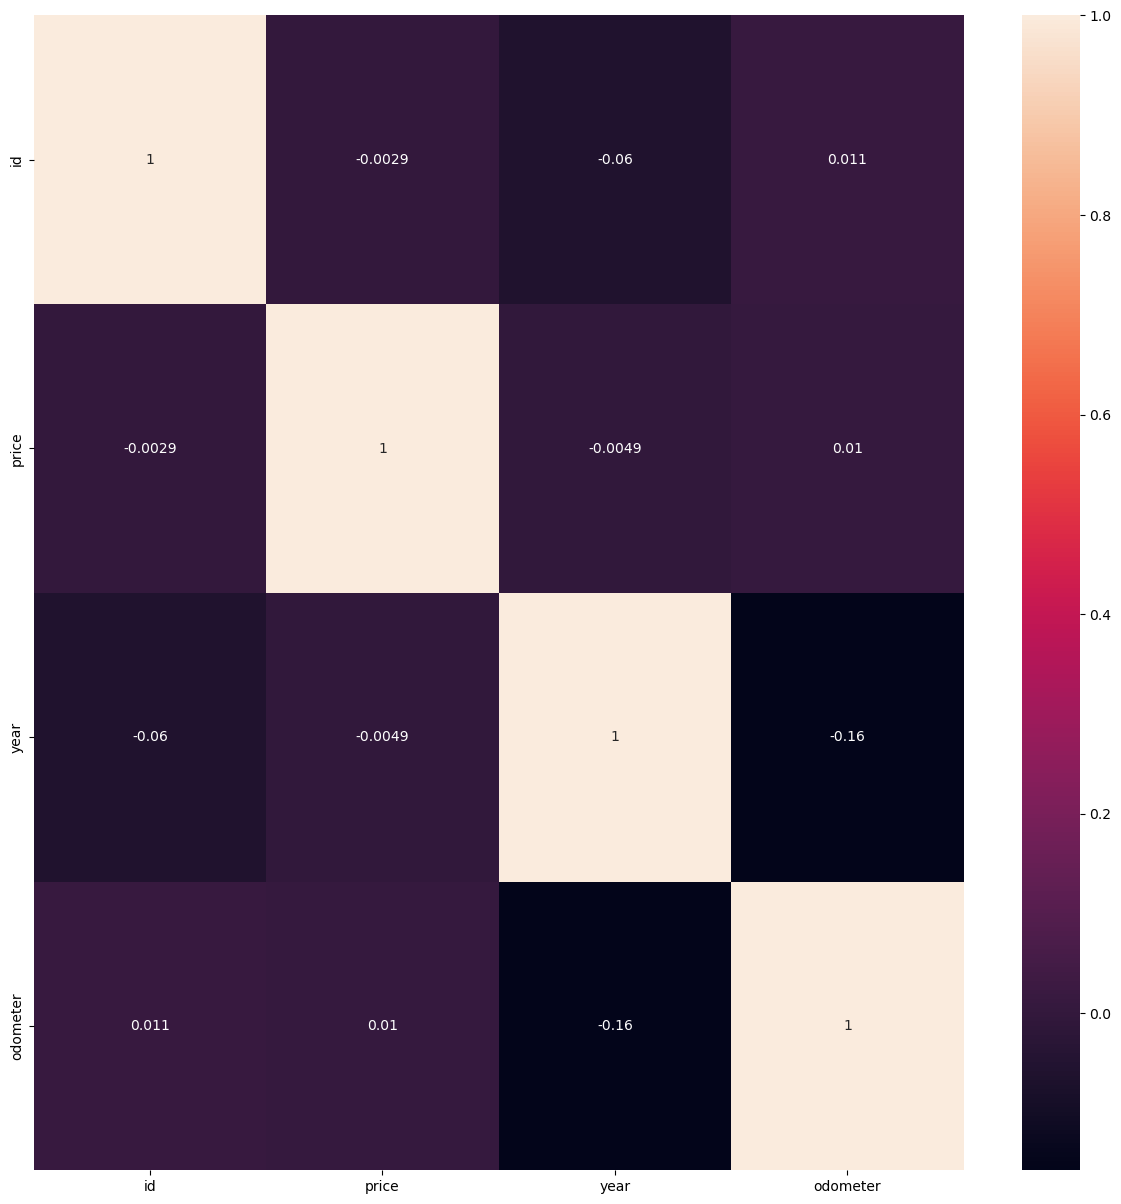

In [1079]:
data_numeric_only = used_cars.select_dtypes(include=['int64', 'float64'])
data_numeric_only = data_numeric_only.dropna()
data_num_corr = data_numeric_only.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(data_num_corr, annot=True, ax=ax)

#### Early heat map shows nothign useful, not much correlation

Text(0.5, 1.0, 'Box Plot of Price')

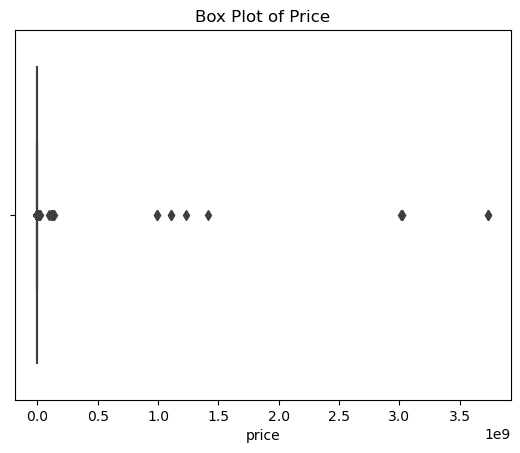

In [1080]:
sns.boxplot(x=used_cars['price'])
plt.title("Box Plot of Price")

In [1081]:
used_cars['price'].max()

3736928711

<Axes: xlabel='price'>

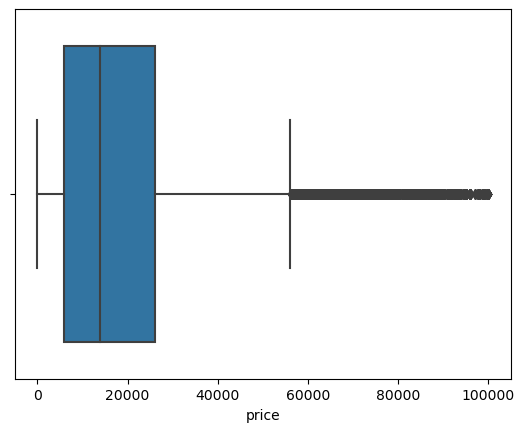

In [1082]:
df = used_cars.query('price < 100000')
sns.boxplot(x=df['price'])

#### We seem to have a lot of outliers in 'price', have to handle this after we fill/remove NaN

,fuel,price
3,hybrid,14582.430948
1,electric,24648.362191
4,other,66811.403899
2,gas,73902.259659
0,diesel,118177.693467


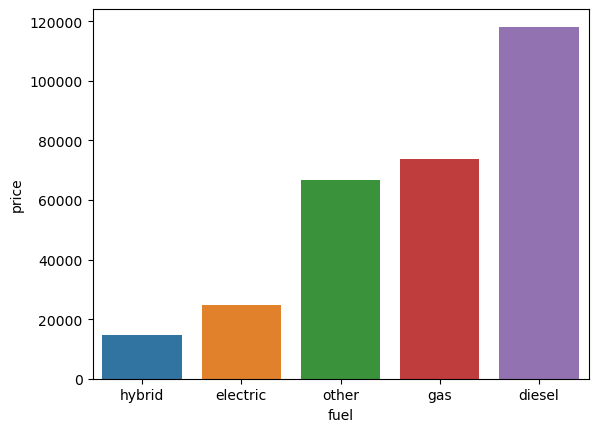

In [1083]:
df = used_cars.groupby('fuel')[['price']].mean().reset_index().sort_values(by='price')
sns.barplot(df, x='fuel', y='price')
df

,fuel,price
3,hybrid,11280.327059
4,other,12234.093750
2,gas,14254.178137
1,electric,21725.367089
0,diesel,32784.723418


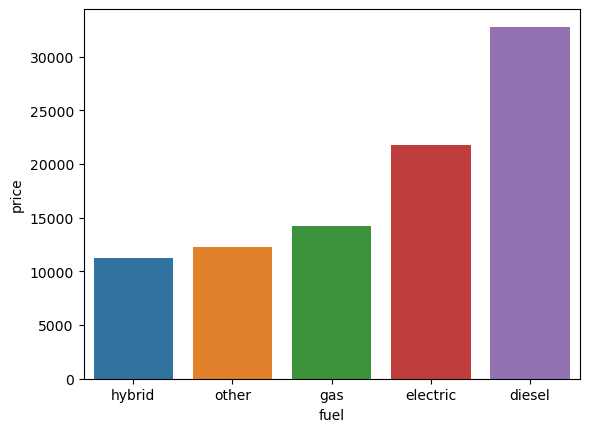

In [1084]:
df = used_cars.dropna()
df = df.groupby('fuel')[['price']].mean().reset_index().sort_values(by='price')
sns.barplot(df, x='fuel', y='price')
df

#### Removing NaN seems to change the mean price per fuel category. Need to verify this after we fill/remove NaN.

Text(0.5, 1.0, 'Manufacturer Vs Price')

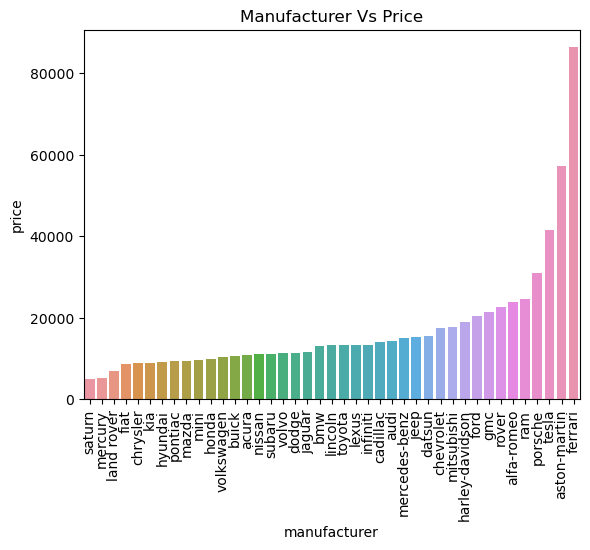

In [1085]:
df = used_cars.dropna()
df = df.groupby('manufacturer')[['price']].mean().reset_index().sort_values(by='price')
sns.barplot(df, x='manufacturer', y='price')
plt.xticks(rotation=90);
plt.title("Manufacturer Vs Price")

#### Ferrari has a very high price point compared to others which is accurate

#### Most of the columns are categorical, so should use OneHot or Ordinal Encoders and some columns can be removed
1. 'id', 'VIN' can be dropped as they don't affect the 'price'
2. 'region', 'state', 'model' have too many unique values and OneHotEncoding these will add noise to data. These can be removed before modeling
3. OrdinalEncoder can be used for 'condition' and 'title_status' and 'size'
4. OneHotEncoder can be used for 'type', 'drive' , 'paint_color', 'manufacturer', 'fuel','transmission'
5. Use StandardScaler to normalize data before modeling

#### General guideline for filling columns based on domain:
1. Only columns that have 10000 or more NaN are considered
2. 'Manufacturer' can be filled from 'Model'
3. 'Cylinders' can be filled from 'Model'
4. 'Condition' can be filled from 'odometer' and 'year'
5. 'Type', 'Size', 'Drive' all can be filled from 'model'
6. 'paint_color' can be filled from 'model' and 'price'

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Filling Manufacturer

In [1086]:
good_model_mfg = used_cars.query('model.notna() and manufacturer.notna()')[['model', 'manufacturer']]
dict_mfg = pd.Series(good_model_mfg.manufacturer.values,index=good_model_mfg.model).to_dict()

In [1087]:
def fillManufacturer(x):
    modelvalue = str(x['model'])
    return dict_mfg.get(modelvalue)

print(used_cars.isna().sum())
used_cars['manufacturer'] = used_cars.apply(lambda x : fillManufacturer(x) if (pd.isna(x['manufacturer'])) else x['manufacturer'], axis=1)
used_cars.isna().sum()                              

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

#### Filling Cylinders

In [1088]:
good_model_cyl = used_cars.query('model.notna() and cylinders.notna()')[['model', 'cylinders']]
dict_cyl = pd.Series(good_model_cyl.cylinders.values,index=good_model_cyl.model).to_dict()


In [1089]:
def fillCylinder(x):
    modelvalue = str(x['model'])
    return dict_cyl.get(modelvalue)

print(used_cars.isna().sum())
used_cars['cylinders'] = used_cars.apply(lambda x : fillCylinder(x) if (pd.isna(x['cylinders'])) else x['cylinders'], axis=1)
used_cars.isna().sum() 

id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition       174104
cylinders        40633
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [1090]:
good_cond = used_cars.query('odometer.notna() and year.notna() and condition.notna()')[['odometer', 'year', 'condition']]
good_cond['odometer'] = good_cond.odometer.round(-4)
good_cond['odoyear'] = good_cond['odometer'].astype('str') + "_" + good_cond['year'].astype('str')
dict_cond = pd.Series(good_cond.condition.values,index=good_cond.odoyear).to_dict()
dict_cond

{'60000.0_2014.0': 'good',
 '70000.0_2010.0': 'good',
 '20000.0_2020.0': 'good',
 '40000.0_2017.0': 'good',
 '130000.0_2013.0': 'excellent',
 '70000.0_2012.0': 'excellent',
 '30000.0_2016.0': 'good',
 '40000.0_2019.0': 'good',
 '20000.0_2016.0': 'excellent',
 '30000.0_2011.0': 'good',
 '190000.0_1992.0': 'salvage',
 '30000.0_2017.0': 'good',
 '20000.0_2014.0': 'good',
 '10000.0_2016.0': 'good',
 '0.0_2019.0': 'good',
 '40000.0_2018.0': 'good',
 '100000.0_2011.0': 'excellent',
 '20000.0_2018.0': 'good',
 '10000.0_2020.0': 'good',
 '0.0_2020.0': 'good',
 '10000.0_2019.0': 'good',
 '90000.0_2004.0': 'excellent',
 '40000.0_2016.0': 'good',
 '40000.0_2015.0': 'good',
 '100000.0_2012.0': 'excellent',
 '30000.0_2018.0': 'good',
 '80000.0_2013.0': 'good',
 '20000.0_2017.0': 'good',
 '140000.0_2001.0': 'excellent',
 '60000.0_2013.0': 'good',
 '30000.0_2014.0': 'like new',
 '40000.0_2012.0': 'good',
 '90000.0_2017.0': 'good',
 '70000.0_2017.0': 'good',
 '10000.0_2018.0': 'good',
 '10000.0_2013.0

#### Filling Condition

In [1091]:
def fillCondition(x):
    odometerValue = str(round(x['odometer'], -4))
    yearValue = str(x['year'])
    odoyearValue = odometerValue + "_" + yearValue
    return dict_cond.get(odoyearValue)

print(used_cars.isna().sum())
used_cars['condition'] = used_cars.apply(lambda x : fillCondition(x) if (pd.isna(x['condition'])) else x['condition'], axis=1)
used_cars.isna().sum() 

id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition       174104
cylinders        40633
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition         4207
cylinders        40633
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

#### Filling Drive:

In [1092]:
good_drive = used_cars.query('model.notna() and drive.notna()')[['model', 'drive']]
dict_drive = pd.Series(good_drive.drive.values,index=good_drive.model).to_dict()
dict_drive

{'f-150 xlt': '4wd',
 'sierra 2500 hd extended cab': '4wd',
 'silverado 1500 double': '4wd',
 'tacoma': '4wd',
 'colorado extended cab': '4wd',
 'corvette grand sport': 'rwd',
 'cherokee': '4wd',
 'wrangler unlimited sport': '4wd',
 'colorado crew cab z71': '4wd',
 'camaro ss coupe 2d': 'rwd',
 'frontier crew cab pro-4x': '4wd',
 'wrangler sport suv 2d': '4wd',
 'mx-5 miata club': 'rwd',
 'xt4 sport suv 4d': 'fwd',
 'f250 super duty': '4wd',
 'renegade sport suv 4d': '4wd',
 'odyssey': 'fwd',
 'mustang gt premium': 'rwd',
 'f450': '4wd',
 'tundra double cab pickup': '4wd',
 'wrangler unlimited sahara': '4wd',
 'charger rt 4dr sedan': 'rwd',
 'civic si coupe 2d': 'fwd',
 'civic lx sedan 4d': 'fwd',
 'expedition xlt sport': '4wd',
 'civic ex sedan 4d': 'fwd',
 'tacoma double cab pickup': '4wd',
 'nx 300 sport utility 4d': 'fwd',
 'town & country': 'fwd',
 's60 t5 momentum sedan 4d': 'fwd',
 'Scion iM Hatchback 4D': 'fwd',
 'a6 2.0t premium sedan 4d': 'fwd',
 'sonata sport sedan 4d': 'fwd

In [1093]:
def fillDrive(x):
    modelValue = str(x['model'])
    return dict_drive.get(modelValue)

print(used_cars.isna().sum())
used_cars['drive'] = used_cars.apply(lambda x : fillDrive(x) if (pd.isna(x['drive'])) else x['drive'], axis=1)
used_cars.isna().sum() 

id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition         4207
cylinders        40633
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition         4207
cylinders        40633
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive            25944
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

#### Filling Size

In [1094]:
good_size = used_cars.query('model.notna() and size.notna()')[['model', 'size']]
good_size.rename(columns={"size":"vsize"},inplace=True)
dict_size = pd.Series(good_size.vsize.values,index=good_size.model).to_dict()
dict_size

{'f-150 xlt': 'full-size',
 'compass': 'compact',
 'f250 super duty': 'full-size',
 'odyssey': 'full-size',
 'f450': 'full-size',
 'charger rt 4dr sedan': 'mid-size',
 'town & country': 'mid-size',
 'fj cruiser': 'mid-size',
 'blue bird bus': 'full-size',
 'express cargo van': 'mid-size',
 '1966 C-30 1 ton': 'full-size',
 'grand cherokee laredo': 'full-size',
 'tlx': 'full-size',
 'f150 supercrew cab xlt': 'full-size',
 'rx350': 'mid-size',
 'gx470': 'full-size',
 'thunderbird': 'mid-size',
 'f150': 'full-size',
 'silverado 2500': 'full-size',
 'echo': 'compact',
 'blazer': 'mid-size',
 '525i': 'full-size',
 'yukon xl': 'full-size',
 'accord': 'mid-size',
 'f-150': 'full-size',
 'silverado 2500hd 4x4': 'full-size',
 '1929 ssk replica': 'mid-size',
 'tahoe': 'full-size',
 'SPECIAL FINANCE PROGRAM 2020': 'full-size',
 's-class': 'full-size',
 'silverado': 'full-size',
 '1987 Saab 900 Turbo': 'mid-size',
 'miata mx-5': 'compact',
 'corvette': 'compact',
 'bel air': 'full-size',
 'cls': 'f

In [1095]:
def fillSize(x):
    modelValue = str(x['model'])
    return dict_size.get(modelValue)

print(used_cars.isna().sum())
used_cars['size'] = used_cars.apply(lambda x : fillSize(x) if (pd.isna(x['size'])) else x['size'], axis=1)
used_cars.isna().sum() 

id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition         4207
cylinders        40633
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive            25944
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition         4207
cylinders        40633
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive            25944
size             90463
type             92858
paint_color     130203
state                0
dtype: int64

In [1096]:
good_type = used_cars.query('model.notna() and type.notna()')[['model', 'type']]
dict_type = pd.Series(good_type.type.values,index=good_type.model).to_dict()
dict_type

{'sierra 1500 crew cab slt': 'pickup',
 'silverado 1500': 'truck',
 'silverado 1500 crew': 'pickup',
 'tundra double cab sr': 'pickup',
 'f-150 xlt': 'pickup',
 'sierra 2500 hd extended cab': 'pickup',
 'silverado 1500 double': 'pickup',
 'tacoma': 'truck',
 'colorado extended cab': 'pickup',
 'corvette grand sport': 'coupe',
 'wrangler unlimited sport': 'offroad',
 'silverado 1500 regular': 'pickup',
 'colorado crew cab z71': 'pickup',
 'tacoma access cab pickup': 'pickup',
 'camaro ss coupe 2d': 'coupe',
 'tundra crewmax sr5 pickup': 'pickup',
 'ranger supercrew xl pickup': 'pickup',
 'frontier crew cab pro-4x': 'pickup',
 'compass': 'SUV',
 'f150 super cab xl pickup 4d': 'pickup',
 'tacoma double cab sr5': 'truck',
 'wrangler sport suv 2d': 'other',
 'f150 supercrew cab xlt': 'pickup',
 '1500 regular cab tradesman': 'pickup',
 'mx-5 miata club': 'other',
 'ranger supercab xl pickup': 'pickup',
 'xt4 sport suv 4d': 'hatchback',
 'f250 super duty': 'pickup',
 'renegade sport suv 4d': 

#### Filling Type

In [1097]:
def fillType(x):
    modelValue = str(x['model'])
    return dict_type.get(modelValue)

print(used_cars.isna().sum())
used_cars['type'] = used_cars.apply(lambda x : fillType(x) if (pd.isna(x['type'])) else x['type'], axis=1)
used_cars.isna().sum() 

id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition         4207
cylinders        40633
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive            25944
size             90463
type             92858
paint_color     130203
state                0
dtype: int64


id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition         4207
cylinders        40633
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive            25944
size             90463
type             12588
paint_color     130203
state                0
dtype: int64

#### Filling Paint

In [1098]:
good_paint = used_cars.query('model.notna() and paint_color.notna() and price.notna()')[['model', 'paint_color', 'price']]
good_paint['price'] = good_paint.price.round(-2)
good_paint['modelprice'] = good_paint['price'].astype('str') + "_" + good_paint['model'].astype('str')
dict_paint = pd.Series(good_paint.paint_color.values,index=good_paint.modelprice).to_dict()
dict_paint

{'33600_sierra 1500 crew cab slt': 'white',
 '22600_silverado 1500': 'blue',
 '39600_silverado 1500 crew': 'brown',
 '31000_tundra double cab sr': 'red',
 '15000_f-150 xlt': 'red',
 '28000_sierra 2500 hd extended cab': 'black',
 '34600_silverado 1500 double': 'silver',
 '35000_tacoma': 'white',
 '30000_colorado extended cab': 'red',
 '38600_corvette grand sport': 'white',
 '33000_wrangler unlimited sport': 'red',
 '24600_silverado 1500 regular': 'white',
 '31000_colorado crew cab z71': 'blue',
 '28000_tacoma access cab pickup': 'red',
 '38000_camaro ss coupe 2d': 'red',
 '33600_tundra crewmax sr5 pickup': 'red',
 '31000_ranger supercrew xl pickup': 'white',
 '28000_frontier crew cab pro-4x': 'silver',
 '34600_f150 super cab xl pickup 4d': 'white',
 '30600_tacoma double cab sr5': 'red',
 '33000_wrangler sport suv 2d': 'silver',
 '22600_1500 regular cab tradesman': 'white',
 '28000_ranger supercab xl pickup': 'white',
 '31600_xt4 sport suv 4d': 'black',
 '19900_f250 super duty': 'white',

In [1099]:
def fillPaint(x):
    priceValue = str(round(x['price'], -2))
    modelValue = str(x['model'])
    pricemodelValue = priceValue + "_" + modelValue
    return dict_paint.get(pricemodelValue)

print(used_cars.isna().sum())
used_cars['paint_color'] = used_cars.apply(lambda x : fillPaint(x) if (pd.isna(x['paint_color'])) else x['paint_color'], axis=1)
used_cars.isna().sum() 

id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition         4207
cylinders        40633
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive            25944
size             90463
type             12588
paint_color     130203
state                0
dtype: int64


id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition         4207
cylinders        40633
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive            25944
size             90463
type             12588
paint_color      64319
state                0
dtype: int64

#### Dropped all remaining NaN

In [1100]:
used_cars = used_cars.dropna()
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163379 entries, 28 to 426875
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            163379 non-null  int64  
 1   region        163379 non-null  object 
 2   price         163379 non-null  int64  
 3   year          163379 non-null  float64
 4   manufacturer  163379 non-null  object 
 5   model         163379 non-null  object 
 6   condition     163379 non-null  object 
 7   cylinders     163379 non-null  object 
 8   fuel          163379 non-null  object 
 9   odometer      163379 non-null  float64
 10  title_status  163379 non-null  object 
 11  transmission  163379 non-null  object 
 12  VIN           163379 non-null  object 
 13  drive         163379 non-null  object 
 14  size          163379 non-null  object 
 15  type          163379 non-null  object 
 16  paint_color   163379 non-null  object 
 17  state         163379 non-null  object 
dtypes: float

#### Converted object columns to string type

In [1101]:
cols = used_cars.select_dtypes("object")
cols

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
28,auburn,chevrolet,silverado 1500,good,8 cylinders,gas,clean,other,1GCSCSE06AZ123805,4wd,full-size,pickup,blue,al
30,auburn,toyota,tundra double cab sr,good,8 cylinders,gas,clean,other,5TFRM5F17HX120972,4wd,full-size,pickup,red,al
35,auburn,chevrolet,colorado extended cab,good,6 cylinders,gas,clean,other,1GCHTCE37G1186784,4wd,mid-size,pickup,red,al
36,auburn,chevrolet,corvette grand sport,good,8 cylinders,gas,clean,other,1G1YR3DW3B5102190,rwd,full-size,other,red,al
38,auburn,jeep,wrangler unlimited sport,good,6 cylinders,gas,clean,other,1C4BJWDG5HL705371,4wd,full-size,other,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426864,wyoming,toyota,4runner sr5 sport utility,good,6 cylinders,gas,clean,automatic,JTEZU5JR1G5145918,4wd,full-size,SUV,black,wy
426868,wyoming,toyota,venza,excellent,6 cylinders,gas,clean,automatic,4T3BK3BB0AU043625,4wd,mid-size,SUV,blue,wy
426872,wyoming,mercedes-benz,c-class c 300,good,4 cylinders,gas,clean,other,55SWF8DB6LU325050,rwd,compact,sedan,white,wy
426874,wyoming,lexus,gs 350 sedan 4d,good,6 cylinders,gas,clean,automatic,JTHBZ1BLXJA012999,rwd,mid-size,sedan,white,wy


In [1102]:
for col in cols:
    used_cars[col] = used_cars[col].astype("str")

#### Converted `cylinders` to numeric

In [1103]:
used_cars['cylinders'].value_counts()

cylinders
4 cylinders     59034
6 cylinders     54702
8 cylinders     45816
5 cylinders      1295
other             872
3 cylinders       836
10 cylinders      792
12 cylinders       32
Name: count, dtype: int64

In [1104]:
cond = (used_cars['cylinders'] == 'other')
used_cars['cylinders'] = np.where(cond, np.nan, used_cars['cylinders'])

In [1105]:
used_cars = used_cars.dropna()

In [1106]:
used_cars['cylinders'] = used_cars['cylinders'].str.replace(" cylinders", "")

In [1107]:
used_cars['cylinders'] = pd.to_numeric(used_cars['cylinders'])

In [1108]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162507 entries, 28 to 426875
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            162507 non-null  int64  
 1   region        162507 non-null  object 
 2   price         162507 non-null  int64  
 3   year          162507 non-null  float64
 4   manufacturer  162507 non-null  object 
 5   model         162507 non-null  object 
 6   condition     162507 non-null  object 
 7   cylinders     162507 non-null  int64  
 8   fuel          162507 non-null  object 
 9   odometer      162507 non-null  float64
 10  title_status  162507 non-null  object 
 11  transmission  162507 non-null  object 
 12  VIN           162507 non-null  object 
 13  drive         162507 non-null  object 
 14  size          162507 non-null  object 
 15  type          162507 non-null  object 
 16  paint_color   162507 non-null  object 
 17  state         162507 non-null  object 
dtypes: float

#### Dropping columns

In [1109]:
used_cars_clean = used_cars.drop(['region', 'state', 'model', 'VIN', 'id'], axis=1)
used_cars_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162507 entries, 28 to 426875
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         162507 non-null  int64  
 1   year          162507 non-null  float64
 2   manufacturer  162507 non-null  object 
 3   condition     162507 non-null  object 
 4   cylinders     162507 non-null  int64  
 5   fuel          162507 non-null  object 
 6   odometer      162507 non-null  float64
 7   title_status  162507 non-null  object 
 8   transmission  162507 non-null  object 
 9   drive         162507 non-null  object 
 10  size          162507 non-null  object 
 11  type          162507 non-null  object 
 12  paint_color   162507 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 17.4+ MB


#### Check for outliers or other abnormalities and clean up

<Axes: xlabel='price'>

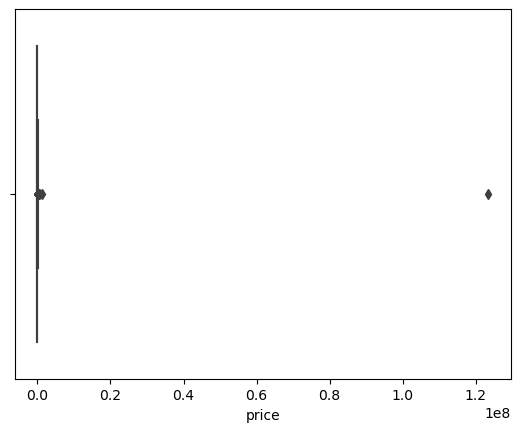

In [1110]:
sns.boxplot(x=used_cars_clean['price'])

In [1111]:
used_cars_clean.sort_values(by='price', ascending=False)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
193736,123456789,2015.0,chevrolet,like new,4,gas,64181.0,clean,automatic,fwd,compact,sedan,red
194292,1234567,2010.0,lincoln,like new,6,gas,85653.0,clean,automatic,4wd,full-size,SUV,custom
90274,304995,2021.0,porsche,new,6,gas,22.0,clean,automatic,rwd,sub-compact,convertible,white
399462,304995,2021.0,porsche,new,6,gas,22.0,clean,automatic,rwd,sub-compact,convertible,white
88588,304995,2021.0,porsche,new,6,gas,22.0,clean,automatic,rwd,sub-compact,convertible,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313866,0,2019.0,ford,good,8,diesel,35911.0,clean,automatic,4wd,full-size,other,white
313863,0,2019.0,volvo,good,4,gas,10295.0,clean,automatic,4wd,mid-size,SUV,white
313862,0,2012.0,ford,excellent,6,gas,108195.0,clean,automatic,4wd,full-size,pickup,blue
49730,0,2011.0,volkswagen,excellent,4,gas,51274.0,clean,automatic,fwd,sub-compact,convertible,black


<Axes: xlabel='price'>

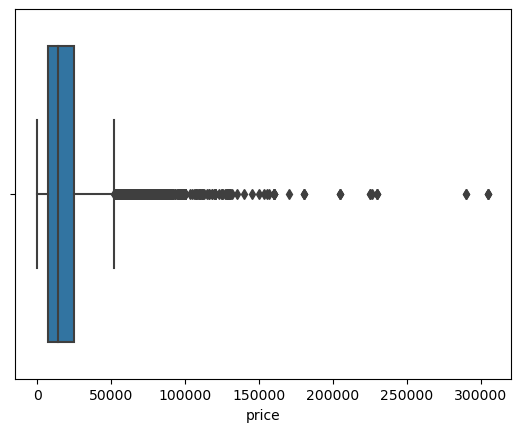

In [1112]:
used_cars_clean = used_cars_clean.query('price < 1234567')
sns.boxplot(x=used_cars_clean['price'])

Text(0.5, 1.0, 'Transmission Vs Price')

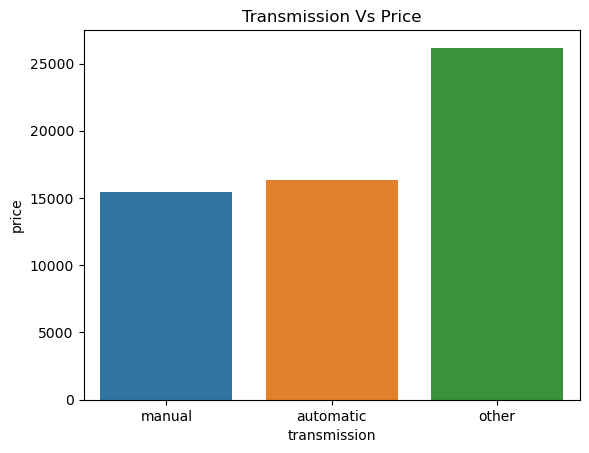

In [1113]:
df = used_cars_clean.groupby('transmission')[['price']].mean().reset_index().sort_values(by='price')
sns.barplot(df, x='transmission', y='price')
df
plt.title("Transmission Vs Price")

,fuel,price
3,hybrid,12711.734383
2,gas,15799.427611
1,electric,19624.303571
4,other,21400.098788
0,diesel,33314.185995


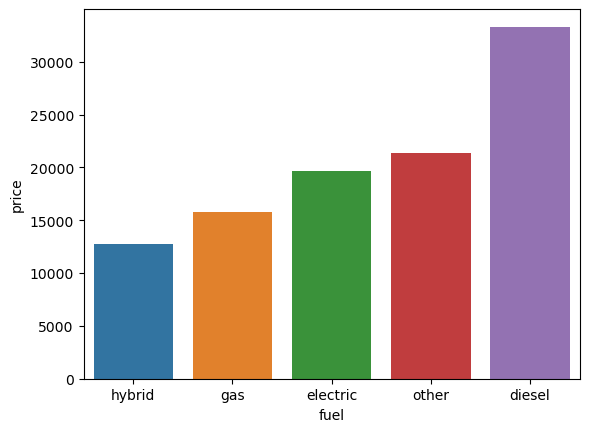

In [1114]:
df = used_cars_clean.groupby('fuel')[['price']].mean().reset_index().sort_values(by='price')
sns.barplot(df, x='fuel', y='price')
df

,type,price
5,mini-van,10309.089597
9,sedan,10952.432082
4,hatchback,12162.909062
12,wagon,12178.836890
6,offroad,14558.164087
0,SUV,15162.069509
1,bus,16501.282609
11,van,17622.901840
2,convertible,18866.466891
7,other,21367.657123


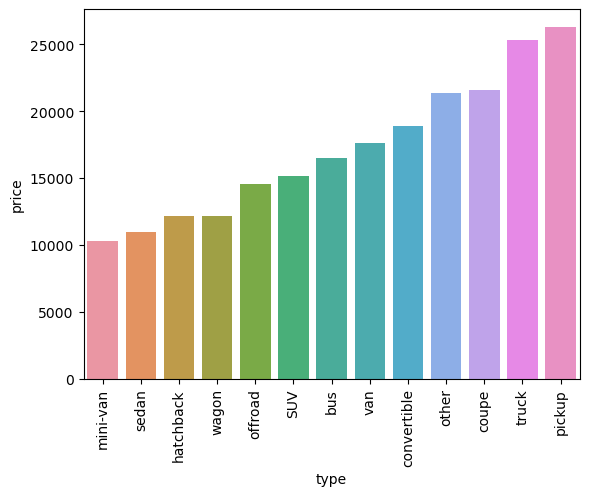

In [1115]:
df = used_cars_clean.groupby('type')[['price']].mean().reset_index().sort_values(by='price')
sns.barplot(df, x='type', y='price')
plt.xticks(rotation=90)
df

,drive,price
1,fwd,10744.116241
2,rwd,20254.905654
0,4wd,21120.778750


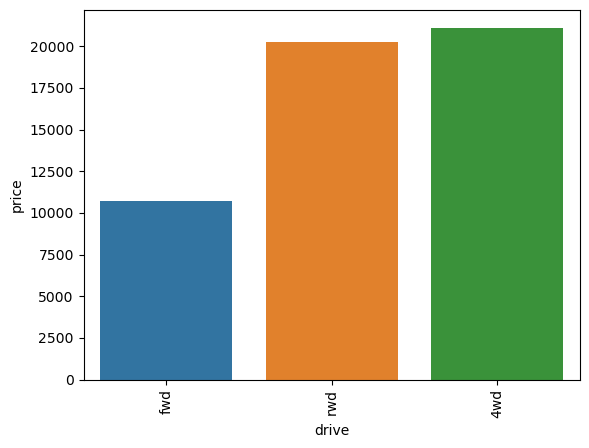

In [1116]:
df = used_cars_clean.groupby('drive')[['price']].mean().reset_index().sort_values(by='price')
sns.barplot(df, x='drive', y='price')
plt.xticks(rotation=90)
df

Text(0.5, 1.0, 'Size Vs Price')

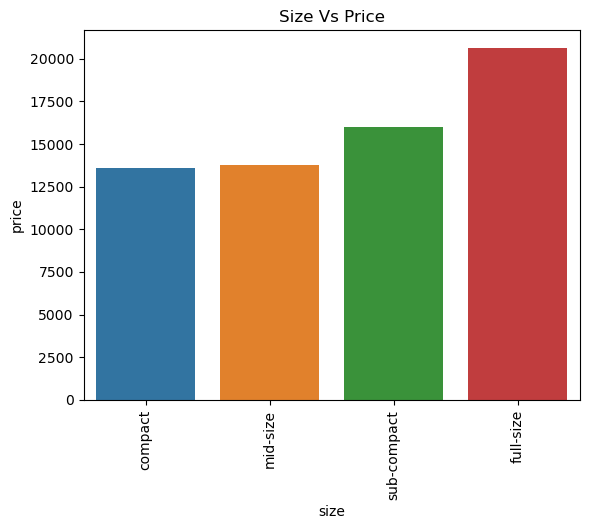

In [1117]:
df = used_cars_clean.groupby('size')[['price']].mean().reset_index().sort_values(by='price')
sns.barplot(df, x='size', y='price')
plt.xticks(rotation=90)
df
plt.title("Size Vs Price")

In [1118]:
used_cars_clean.groupby('size').size()

size
compact        27735
full-size      80587
mid-size       50257
sub-compact     3926
dtype: int64

Text(0.5, 1.0, 'Title Vs Price')

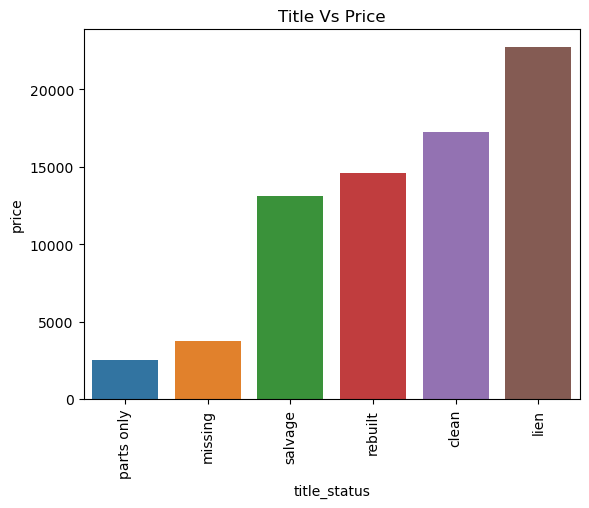

In [1119]:
df = used_cars_clean.groupby('title_status')[['price']].mean().reset_index().sort_values(by='price')
sns.barplot(df, x='title_status', y='price')
plt.xticks(rotation=90)
df
plt.title("Title Vs Price")

Text(0.5, 1.0, 'Condition Vs Price')

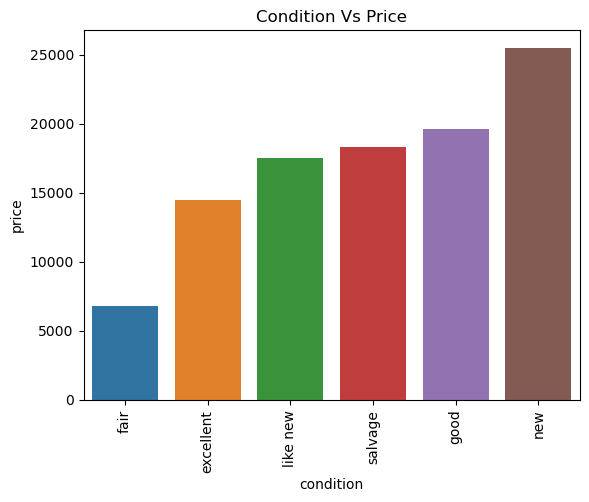

In [1120]:
df = used_cars_clean.groupby('condition')[['price']].mean().reset_index().sort_values(by='price')
sns.barplot(df, x='condition', y='price')
plt.xticks(rotation=90)
df
plt.title("Condition Vs Price")

<Axes: xlabel='price'>

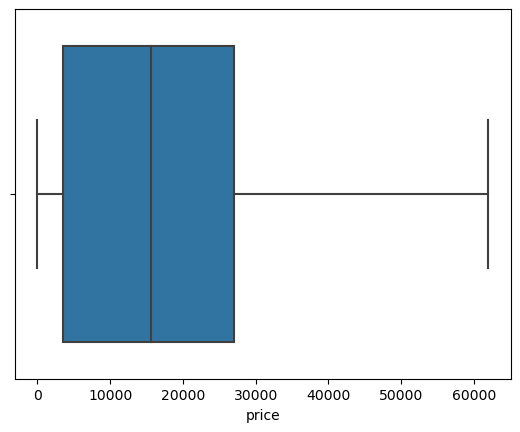

In [1121]:
df = used_cars_clean.query('condition == "salvage"')[['price']]
sns.boxplot(x=df['price'])

Text(0.5, 1.0, 'Condition=good boxplot')

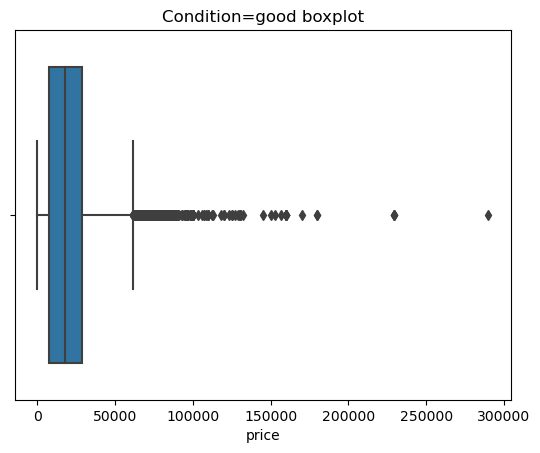

In [1122]:
df = used_cars_clean.query('condition == "good"')[['price']]
sns.boxplot(x=df['price'])
plt.title("Condition=good boxplot")

In [1123]:
used_cars_clean.query('condition == "good"').sort_values(by='price', ascending=False)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
129301,289900,2018.0,ferrari,good,8,gas,3300.0,clean,automatic,rwd,sub-compact,convertible,grey
315274,229500,2018.0,ferrari,good,8,gas,7910.0,salvage,automatic,rwd,sub-compact,convertible,red
8901,229500,2018.0,ferrari,good,8,gas,7910.0,salvage,automatic,rwd,sub-compact,convertible,red
352992,229500,2018.0,ferrari,good,8,gas,7910.0,salvage,automatic,rwd,sub-compact,convertible,red
277077,179999,2018.0,porsche,good,6,gas,11195.0,clean,automatic,rwd,sub-compact,coupe,silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390180,0,2018.0,acura,good,4,gas,28972.0,clean,automatic,fwd,compact,sedan,brown
390183,0,2013.0,chevrolet,good,4,gas,53876.0,clean,automatic,fwd,compact,hatchback,blue
390231,0,2014.0,mercedes-benz,good,4,gas,77558.0,clean,automatic,fwd,sub-compact,sedan,black
27601,0,2014.0,lincoln,good,6,gas,61400.0,clean,automatic,fwd,full-size,SUV,silver


#### Both `size` and `condition` have variations due to car brand, might not be ideal to use OrdinalEncoder for these

In [1124]:
used_cars_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162505 entries, 28 to 426875
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         162505 non-null  int64  
 1   year          162505 non-null  float64
 2   manufacturer  162505 non-null  object 
 3   condition     162505 non-null  object 
 4   cylinders     162505 non-null  int64  
 5   fuel          162505 non-null  object 
 6   odometer      162505 non-null  float64
 7   title_status  162505 non-null  object 
 8   transmission  162505 non-null  object 
 9   drive         162505 non-null  object 
 10  size          162505 non-null  object 
 11  type          162505 non-null  object 
 12  paint_color   162505 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 17.4+ MB


In [1125]:
oe_title = OrdinalEncoder(categories = [['parts only', 'missing', 'salvage', 'rebuilt', 'clean', 'lien']])

ohe = OneHotEncoder(drop = 'if_binary', sparse_output=False, handle_unknown="ignore")

ct = ColumnTransformer(transformers=[
    ("oe_title", oe_title, ['title_status']),
    ("ohe", ohe, ['condition','size','drive', 'type', 'fuel', 'transmission', 'manufacturer', 'paint_color'] )],
    remainder='passthrough'
)

ct.set_output(transform="pandas")
used_cars_clean_transformed = ct.fit_transform(used_cars_clean)
used_cars_clean_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162505 entries, 28 to 426875
Data columns (total 92 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   oe_title__title_status             162505 non-null  float64
 1   ohe__condition_excellent           162505 non-null  float64
 2   ohe__condition_fair                162505 non-null  float64
 3   ohe__condition_good                162505 non-null  float64
 4   ohe__condition_like new            162505 non-null  float64
 5   ohe__condition_new                 162505 non-null  float64
 6   ohe__condition_salvage             162505 non-null  float64
 7   ohe__size_compact                  162505 non-null  float64
 8   ohe__size_full-size                162505 non-null  float64
 9   ohe__size_mid-size                 162505 non-null  float64
 10  ohe__size_sub-compact              162505 non-null  float64
 11  ohe__drive_4wd                     162505 n

#### Checking correlation

In [1126]:
data_num_corr = used_cars_clean_transformed.corr()

s = data_num_corr.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

so.reset_index().query('level_0 == "remainder__price" | level_1 == "remainder_price"')

,level_0,level_1,0
64,remainder__price,remainder__price,1.000000
101,remainder__price,remainder__cylinders,0.339770
109,remainder__price,remainder__year,0.307664
115,remainder__price,ohe__fuel_diesel,0.280803
125,remainder__price,ohe__drive_4wd,0.259715
...,...,...,...
8332,remainder__price,ohe__size_mid-size,-0.156930
8402,remainder__price,ohe__fuel_gas,-0.239124
8408,remainder__price,ohe__type_sedan,-0.252751
8424,remainder__price,remainder__odometer,-0.302499


#### It seems there is no strong correlation here but `cylinders` , `year`  , `odometer` , `drive_fwd` have weak correlation to `price` when compared to other features

#### We have 92 columns which is a lot to model due to slow runtime,need to look at reducing dimensionality and pick only the top features to do the modeling

#### Lets first split the data into training, dev and test sets

In [1127]:
from sklearn.utils import shuffle

training_set, cv_set = np.split(shuffle(used_cars_clean_transformed,random_state=22), [int(used_cars_clean_transformed.shape[0]*0.80)])
columnList = training_set.columns.tolist()
columnList.remove("remainder__price")
X = training_set[columnList]
y = training_set['remainder__price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=22, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(cv_set.shape)

(104003, 91)
(26001, 91)
(32501, 92)


#### Now scale the data

In [1128]:
cols = X_train.columns
sc = StandardScaler()
X_train_sc = pd.DataFrame(sc.fit_transform(X_train), columns=cols)
X_test_sc = pd.DataFrame(sc.transform(X_test), columns=cols)
X_cv_sc = pd.DataFrame(sc.transform(cv_set[columnList]), columns=cols)
y_cv = cv_set['remainder__price']

#### Feature importance

In [1129]:
model = Ridge(random_state=22)
model.fit(X_train_sc, y_train)
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_test_sc, y_test,
                            n_repeats=100,
                            random_state=0)

r.importances_mean

array([ 1.08393972e-03,  1.52584081e-03,  8.61889923e-05,  7.98145497e-04,
        3.29793051e-04,  2.62900521e-04, -6.28537094e-05,  7.05362539e-04,
        1.30740424e-03,  2.10510538e-04,  3.94520736e-05,  4.33415705e-03,
        9.44321576e-03,  1.46381068e-03,  3.51716596e-03,  1.23438310e-05,
        9.58772323e-04,  4.35781569e-03,  1.58972596e-03,  9.05052276e-05,
       -3.09169527e-06,  1.13664205e-03,  1.30253041e-02,  1.00685042e-02,
        3.72388906e-03,  6.29255012e-05,  9.91905086e-04,  4.58914996e-02,
       -4.00386678e-05,  6.87190723e-03,  1.30087647e-04,  6.42494498e-03,
        5.30866905e-03,  5.44264154e-04,  4.66477425e-03, -8.10880090e-06,
        4.43961694e-04,  1.85288693e-04,  1.53293481e-06,  6.13640491e-05,
        8.54190160e-05,  5.26522723e-04,  1.26554500e-04,  8.93813324e-04,
        3.64033704e-04,  1.80862224e-03,  2.11706282e-02,  4.19487789e-04,
       -8.33967976e-06,  2.35130934e-04,  1.17914429e-07,  2.78369856e-05,
        7.23904538e-04, -

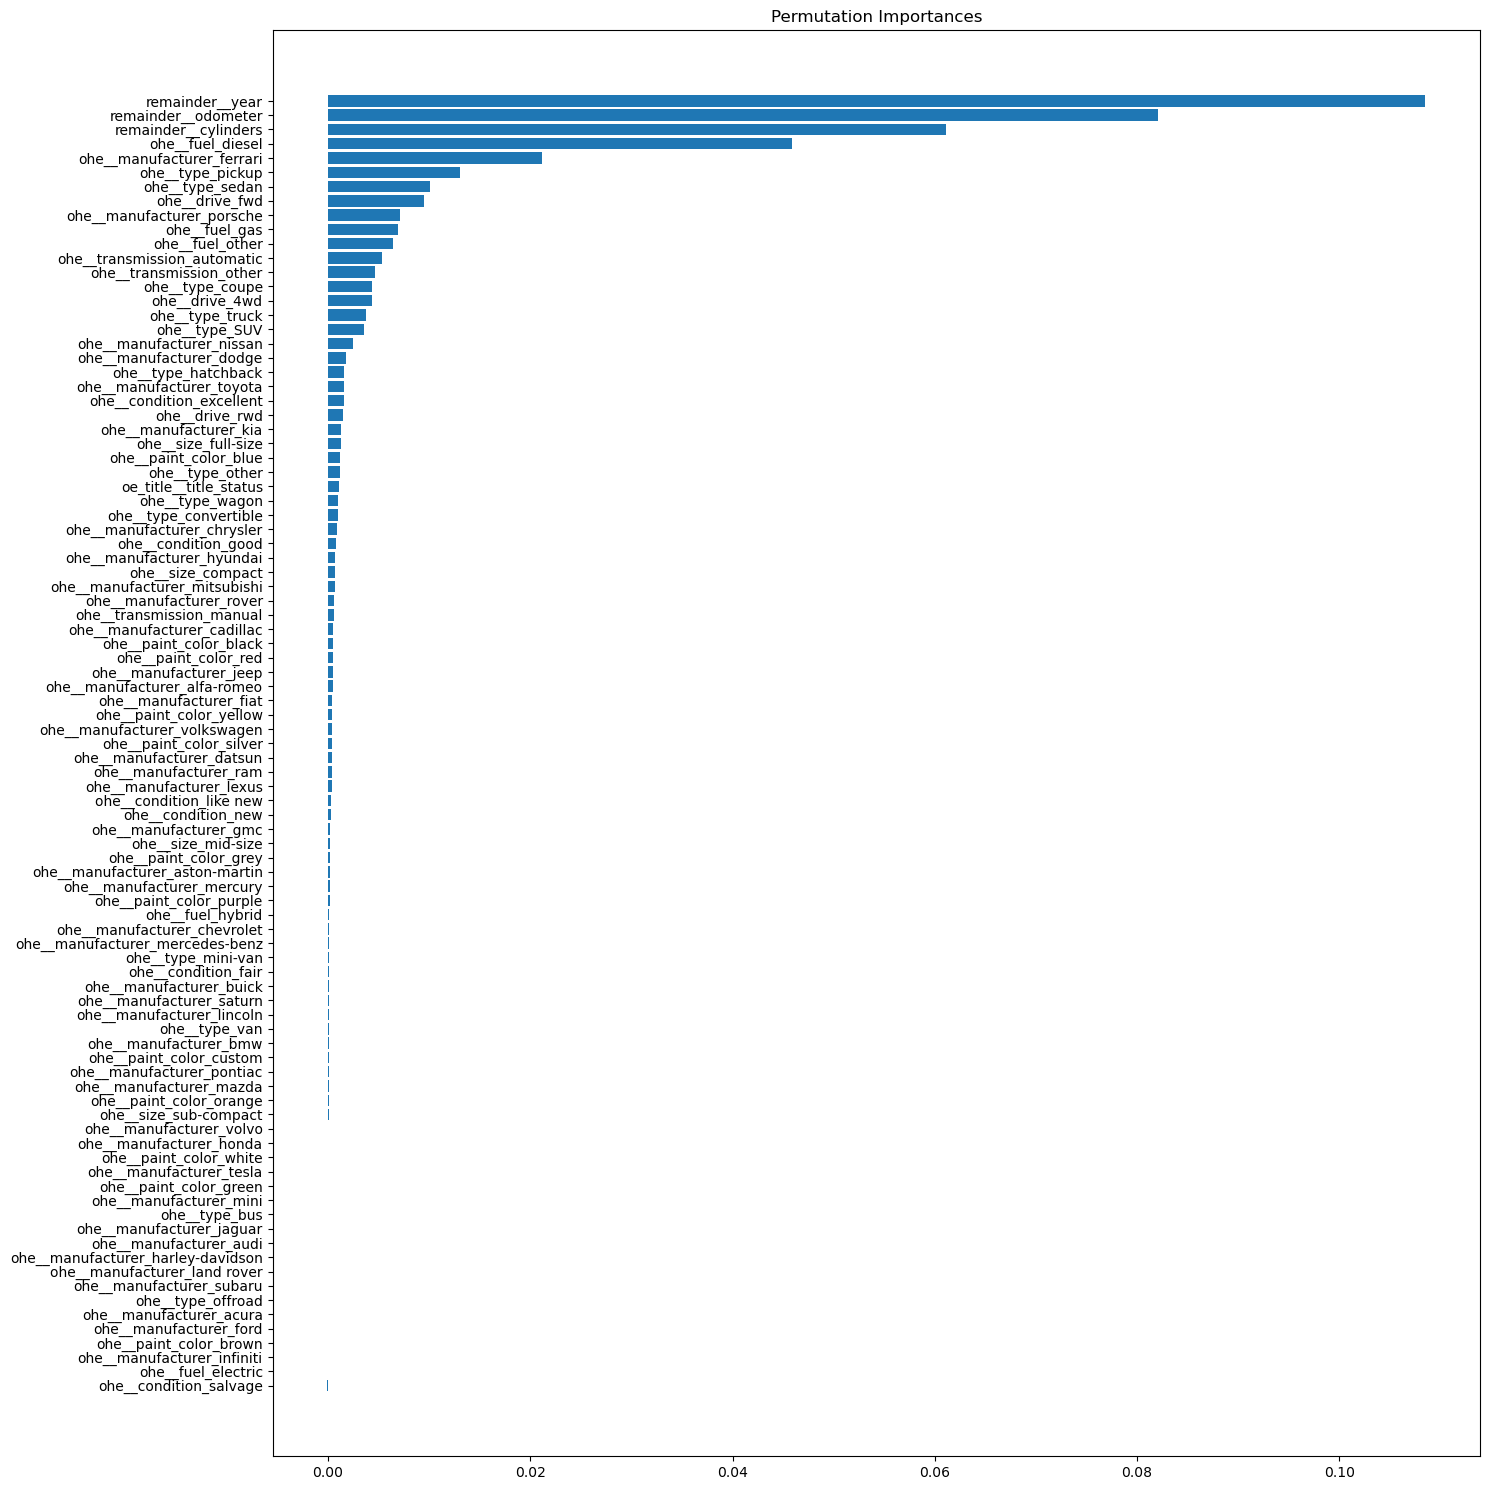

In [1130]:
sorted_idx = r.importances_mean.argsort()

fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
ax.barh(X_train.columns[sorted_idx], r.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances")
fig.tight_layout()
fig.savefig("images/importance.png")
plt.show()

#### PCA

In [1131]:
from sklearn.decomposition import PCA
pca_opt = PCA(0.80, random_state=42)#80%
pca_opt.fit(X_train_sc)
X_train_pca = pca_opt.transform(X_train_sc)
X_test_pca = pca_opt.transform(X_test_sc)
print(X_train_pca.shape)
print(X_test_pca.shape)

(104003, 59)
(26001, 59)


In [1132]:
n_pcs = pca_opt.components_.shape[0]
most_important_columns = [np.abs(pca_opt.components_[i]).argmax() for i in range(n_pcs)]
important_features_by_pc = [X_train_sc.columns[most_important_columns[i]] for i in range(n_pcs)]
important_features_by_pc

['remainder__cylinders',
 'ohe__transmission_other',
 'ohe__drive_4wd',
 'ohe__fuel_gas',
 'ohe__condition_good',
 'ohe__size_compact',
 'ohe__size_mid-size',
 'ohe__paint_color_black',
 'ohe__condition_excellent',
 'ohe__type_pickup',
 'ohe__size_sub-compact',
 'ohe__manufacturer_dodge',
 'ohe__fuel_electric',
 'ohe__fuel_electric',
 'ohe__manufacturer_chevrolet',
 'ohe__manufacturer_ford',
 'ohe__manufacturer_toyota',
 'ohe__condition_like new',
 'ohe__paint_color_blue',
 'ohe__paint_color_silver',
 'ohe__manufacturer_mitsubishi',
 'ohe__condition_like new',
 'ohe__paint_color_grey',
 'ohe__manufacturer_nissan',
 'ohe__manufacturer_ram',
 'ohe__manufacturer_buick',
 'ohe__manufacturer_chevrolet',
 'ohe__paint_color_blue',
 'ohe__paint_color_brown',
 'oe_title__title_status',
 'ohe__paint_color_custom',
 'ohe__manufacturer_lexus',
 'ohe__manufacturer_audi',
 'ohe__manufacturer_gmc',
 'ohe__manufacturer_mercedes-benz',
 'ohe__paint_color_green',
 'ohe__manufacturer_rover',
 'ohe__manuf

In [1133]:
X_train_pca_df = pd.DataFrame(X_train_pca, columns=important_features_by_pc)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=important_features_by_pc)

#### Sequential Feature Selection

In [1134]:
feature_select = SequentialFeatureSelector(estimator=Ridge(),
                                          n_features_to_select=10)
feature_select.fit(X_train_sc, y_train)
feature_select.get_params()

{'cv': 5,
 'direction': 'forward',
 'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': None,
 'estimator__positive': False,
 'estimator__random_state': None,
 'estimator__solver': 'auto',
 'estimator__tol': 0.0001,
 'estimator': Ridge(),
 'n_features_to_select': 10,
 'n_jobs': None,
 'scoring': None,
 'tol': None}

In [1135]:
top_features_sfs = feature_select.get_feature_names_out().tolist()
top_features_sfs

['ohe__condition_excellent',
 'ohe__drive_fwd',
 'ohe__type_pickup',
 'ohe__fuel_diesel',
 'ohe__transmission_automatic',
 'ohe__manufacturer_ferrari',
 'ohe__manufacturer_porsche',
 'remainder__year',
 'remainder__cylinders',
 'remainder__odometer']

#### We can pick the top features from here and model

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Using Feature Importance to pick features

#### Lets start with 10 features to keep the computation time reasonable

In [1136]:
top_features = X_train_sc.columns[sorted_idx].tolist()
top_features = top_features[len(top_features)-10:]
X_train_sc_top = X_train_sc[top_features]
X_test_sc_top = X_test_sc[top_features]
X_test_sc_top.shape

(26001, 10)

In [1137]:
top_features

['ohe__fuel_gas',
 'ohe__manufacturer_porsche',
 'ohe__drive_fwd',
 'ohe__type_sedan',
 'ohe__type_pickup',
 'ohe__manufacturer_ferrari',
 'ohe__fuel_diesel',
 'remainder__cylinders',
 'remainder__odometer',
 'remainder__year']

#### These features are in line with the correlation we saw before

#### Lets use GridSearchCV to find the right polynomial degree

In [1138]:
poly_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 3, include_bias = False)),
                                    ('ridge', Ridge(random_state=22))])
params_to_try = {"ridge__alpha" : [0.1,10,100],"poly_features__degree": [2,3,4]}
ridge_poly_grid = GridSearchCV(estimator = poly_pipe, param_grid = params_to_try, cv = 5, scoring = 'neg_mean_squared_error')
ridge_poly_grid.fit(X_train_sc_top,y_train)
ridge_best_estimator = ridge_poly_grid.best_estimator_
print("Train MSE")
print(mean_squared_error(y_train, ridge_best_estimator.predict(X_train_sc_top)))
print("Test MSE")
print(mean_squared_error(y_test,ridge_best_estimator.predict(X_test_sc_top)))
print("Train R2 Score")
print(r2_score(y_train, ridge_best_estimator.predict(X_train_sc_top)))
print("Test R2 Score")
print(r2_score(y_test,ridge_best_estimator.predict(X_test_sc_top)))

Train MSE
114873897.37701945
Test MSE
122684606.58601812
Train R2 Score
0.4577545064798543
Test R2 Score
0.4229174354388946


In [1139]:
print(ridge_best_estimator.named_steps['poly_features'].get_params())
print(ridge_best_estimator.named_steps['ridge'].get_params())

{'degree': 2, 'include_bias': False, 'interaction_only': False, 'order': 'C'}
{'alpha': 10, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': 22, 'solver': 'auto', 'tol': 0.0001}


#### Lets use the above hyperparams to find the right number of top features to use

In [1140]:
train_r2 = []
test_r2 = []
train_mse = []
test_mse = []
#for num features in 10,15,20 etc
for i in range(5, 50, 5):
    top_features = X_train_sc.columns[sorted_idx].tolist()
    top_features = top_features[len(top_features)-i:]
    X_train_sc_top = X_train_sc[top_features]
    X_test_sc_top = X_test_sc[top_features]
    poly_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 2, include_bias = False)),
                                    ('ridge', Ridge(alpha=10, random_state=22))])
    poly_pipe.fit(X_train_sc_top,y_train)
    tr_r2 = r2_score(y_train, poly_pipe.predict(X_train_sc_top))
    te_r2 = r2_score(y_test, poly_pipe.predict(X_test_sc_top))
    tr_mse = mean_squared_error(y_train, poly_pipe.predict(X_train_sc_top))
    te_mse = mean_squared_error(y_test,poly_pipe.predict(X_test_sc_top))
    train_r2.append(tr_r2)
    test_r2.append(te_r2)
    train_mse.append(tr_mse)
    test_mse.append(te_mse)
    print("\nNum features {x}:".format(x=i))
    print(tr_r2)
    print(te_r2)
    print(tr_mse)
    print(te_mse)



Num features 5:
0.4121703955636382
0.38133756395034024
124530823.14585948
131524260.5432472

Num features 10:
0.4577545064798543
0.4229174354388946
114873897.37701945
122684606.58601812

Num features 15:
0.47522256311751354
0.43492494460590714
111173315.68560907
120131875.61007306

Num features 20:
0.4851966223217463
0.46730228105327865
109060326.15014733
113248630.42423049

Num features 25:
0.500046929412123
0.48450189386984466
105914310.7879122
109592086.52320817

Num features 30:
0.5096055729878501
0.49929509712251796
103889326.43248057
106447132.17411683

Num features 35:
0.5173602096410262
0.5043866961024316
102246518.24737222
105364685.99378636

Num features 40:
0.5219879811738792
0.5069301178083556
101266131.76467755
104823968.40754125

Num features 45:
0.525189099307232
0.5018040017618375
100587979.67243002
105913752.72802171


Text(0.5, 1.0, 'Test MSE Vs Features')

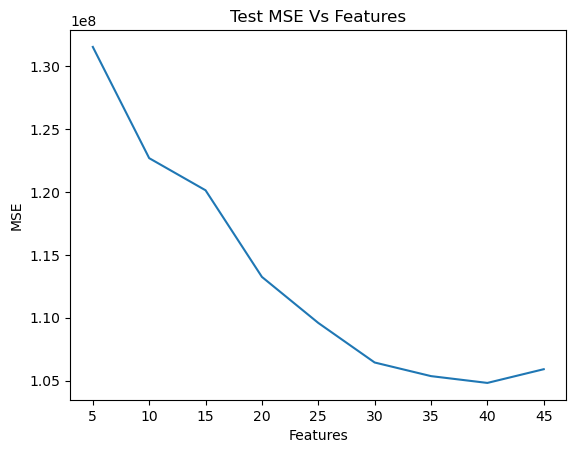

In [1141]:
x_data = range(5,50,5)
plt.plot(x_data, test_mse)
plt.xlabel("Features")
plt.ylabel("MSE")
plt.title("Test MSE Vs Features")

#### Lets pick 40 features to train model

In [1142]:
top_features_fimp = X_train_sc.columns[sorted_idx].tolist()
top_features_fimp = top_features_fimp[len(top_features_fimp)-40:]
X_train_fimp_top = X_train_sc[top_features_fimp]
X_test_fimp_top = X_test_sc[top_features_fimp]
X_test_fimp_top.shape

poly_pipe_fimp = Pipeline([('poly_features', PolynomialFeatures(degree = 2, include_bias = False)),
                                    ('ridge', Ridge(alpha=100, random_state=22))])
poly_pipe_fimp.fit(X_train_fimp_top,y_train)
tr_r2 = r2_score(y_train, poly_pipe_fimp.predict(X_train_fimp_top))
te_r2 = r2_score(y_test, poly_pipe_fimp.predict(X_test_fimp_top))
tr_mse = mean_squared_error(y_train, poly_pipe_fimp.predict(X_train_fimp_top))
te_mse = mean_squared_error(y_test,poly_pipe_fimp.predict(X_test_fimp_top))


print(tr_r2)
print(te_r2)
print(tr_mse)
print(te_mse)

0.5219264051649926
0.5070554134673226
101279176.5501304
104797331.23364048


#### Lets cross validate

In [1143]:
#Cross Validation:
X_cv_set_sc_top = X_cv_sc[top_features_fimp]
print(r2_score(y_cv,poly_pipe_fimp.predict(X_cv_set_sc_top)))
print(mean_squared_error(y_cv,poly_pipe_fimp.predict(X_cv_set_sc_top)))

0.47419569426499364
111802410.87130395


#### Cross validation R2 is in same ball park as dev set

#### Using PCA components

In [1144]:
top_features_pca = X_train_pca_df.columns.tolist()
top_features_pca = top_features_pca[:10]
X_train_pca_top = X_train_sc[top_features_pca]
X_test_pca_top = X_test_sc[top_features_pca]
X_test_pca_top.shape

(26001, 10)

In [1145]:
poly_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 3, include_bias = False)),
                                    ('ridge', Ridge(random_state=22))])
params_to_try = {"ridge__alpha" : [0.1, 1, 100],"poly_features__degree": [1,2,3,4]}
ridge_poly_grid = GridSearchCV(estimator = poly_pipe, param_grid = params_to_try, cv = 5, scoring = 'neg_mean_squared_error')
ridge_poly_grid.fit(X_train_pca_top,y_train)
ridge_best_estimator = ridge_poly_grid.best_estimator_
print("Train MSE")
print(mean_squared_error(y_train, ridge_best_estimator.predict(X_train_pca_top)))
print("Test MSE")
print(mean_squared_error(y_test,ridge_best_estimator.predict(X_test_pca_top)))
print("Train R2 Score")
print(r2_score(y_train, ridge_best_estimator.predict(X_train_pca_top)))
print("Test R2 Score")
print(r2_score(y_test,ridge_best_estimator.predict(X_test_pca_top)))

Train MSE
152876584.26722085
Test MSE
152482341.0275624
Train R2 Score
0.27836836064172044
Test R2 Score
0.2827551649784954


#### This is performing much poorer than the features selected via Feature Importance

#### Using Sequential Feature Selection

In [1146]:
X_train_sfs_top = X_train_sc[top_features_sfs]
X_test_sfs_top = X_test_sc[top_features_sfs]

In [1147]:
poly_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 3, include_bias = False)),
                                    ('ridge', Ridge(random_state=22))])
params_to_try = {"ridge__alpha" : [0.1, 1, 100],"poly_features__degree": [1,2,3,4]}
ridge_poly_grid = GridSearchCV(estimator = poly_pipe, param_grid = params_to_try, cv = 5, scoring = 'neg_mean_squared_error')
ridge_poly_grid.fit(X_train_sfs_top,y_train)
ridge_best_estimator = ridge_poly_grid.best_estimator_
print("Train MSE")
print(mean_squared_error(y_train, ridge_best_estimator.predict(X_train_sfs_top)))
print("Test MSE")
print(mean_squared_error(y_test,ridge_best_estimator.predict(X_test_sfs_top)))
print("Train R2 Score")
print(r2_score(y_train, ridge_best_estimator.predict(X_train_sfs_top)))
print("Test R2 Score")
print(r2_score(y_test,ridge_best_estimator.predict(X_test_sfs_top)))

Train MSE
129137829.34144667
Test MSE
134032584.44335525
Train R2 Score
0.39042369413522215
Test R2 Score
0.3695389363204805


In [1148]:
print(ridge_best_estimator.named_steps['poly_features'].get_params())
print(ridge_best_estimator.named_steps['ridge'].get_params())

{'degree': 1, 'include_bias': False, 'interaction_only': False, 'order': 'C'}
{'alpha': 100, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': 22, 'solver': 'auto', 'tol': 0.0001}


#### Though this gives comparable results to feature importance, it will take up a lot of runtime to find top 20,30,40 features to find the best num of features. We will stick with Feature Importance way of reducing dimension.

#### Lets try other regression types with feature importance

In [1149]:
top_features_fimp = X_train_sc.columns[sorted_idx].tolist()
top_features_fimp = top_features_fimp[len(top_features_fimp)-11:]
X_train_fimp_top = X_train_sc[top_features_fimp]
X_test_fimp_top = X_test_sc[top_features_fimp]
X_test_fimp_top.shape

poly_pipe_fimp = Pipeline([('poly_features', PolynomialFeatures(degree = 2, include_bias = False)),
                                    ('linear', LinearRegression(fit_intercept=False))])
poly_pipe_fimp.fit(X_train_fimp_top,y_train)
tr_r2 = r2_score(y_train, poly_pipe_fimp.predict(X_train_fimp_top))
te_r2 = r2_score(y_test, poly_pipe_fimp.predict(X_test_fimp_top))
tr_mse = mean_squared_error(y_train, poly_pipe_fimp.predict(X_train_fimp_top))
te_mse = mean_squared_error(y_test,poly_pipe_fimp.predict(X_test_fimp_top))


print(tr_r2)
print(te_r2)
print(tr_mse)
print(te_mse)

0.4585185639588605
0.4222778984125024
114712032.94203131
122820568.67064597


#### Simple Linear Regression is doing poorly on test set

In [1150]:
top_features_fimp = X_train_sc.columns[sorted_idx].tolist()
top_features_fimp = top_features_fimp[len(top_features_fimp)-40:]
X_train_fimp_top = X_train_sc[top_features_fimp]
X_test_fimp_top = X_test_sc[top_features_fimp]
X_test_fimp_top.shape

poly_pipe_fimp = Pipeline([('poly_features', PolynomialFeatures(degree = 2, include_bias = False)),
                                    ('lasso', Lasso(alpha=10, random_state=22))])
poly_pipe_fimp.fit(X_train_fimp_top,y_train)
tr_r2 = r2_score(y_train, poly_pipe_fimp.predict(X_train_fimp_top))
te_r2 = r2_score(y_test, poly_pipe_fimp.predict(X_test_fimp_top))
tr_mse = mean_squared_error(y_train, poly_pipe_fimp.predict(X_train_fimp_top))
te_mse = mean_squared_error(y_test,poly_pipe_fimp.predict(X_test_fimp_top))


print(tr_r2)
print(te_r2)
print(tr_mse)
print(te_mse)

0.5206369300151787
0.5073380118730901
101552349.9334043
104737252.35348964


#### This is very similar to Ridge regression.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### From the modeling section we identified that Feature importance is a better approach to dimensinality reduction for this dataset. Replotting the test MSE graph here

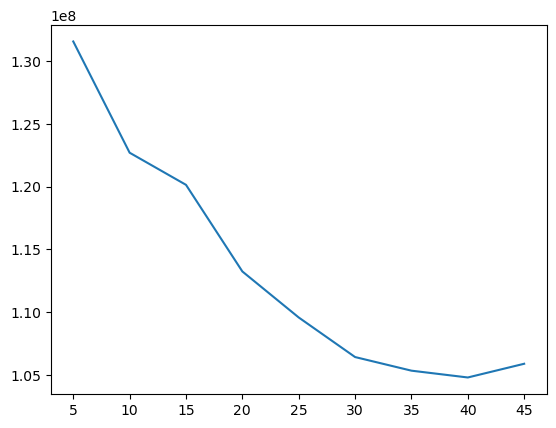

In [1151]:
x_data = range(5,50,5)
plt.plot(x_data, test_mse)

#### Lets pick different num of features to see if it makes a difference in cross validation

In [1152]:
top_features_fimp = X_train_sc.columns[sorted_idx].tolist()
top_features_fimp = top_features_fimp[len(top_features_fimp)-10:]
X_train_fimp_top = X_train_sc[top_features_fimp]
X_test_fimp_top = X_test_sc[top_features_fimp]
X_test_fimp_top.shape

poly_pipe_fimp = Pipeline([('poly_features', PolynomialFeatures(degree = 2, include_bias = False)),
                                    ('ridge', Ridge(alpha=100, random_state=22))])
poly_pipe_fimp.fit(X_train_fimp_top,y_train)
tr_r2 = r2_score(y_train, poly_pipe_fimp.predict(X_train_fimp_top))
te_r2 = r2_score(y_test, poly_pipe_fimp.predict(X_test_fimp_top))
tr_mse = mean_squared_error(y_train, poly_pipe_fimp.predict(X_train_fimp_top))
te_mse = mean_squared_error(y_test,poly_pipe_fimp.predict(X_test_fimp_top))


print(tr_r2)
print(te_r2)
print(tr_mse)
print(te_mse)

0.457735204731627
0.42402266372849406
114877986.42353354
122449641.07809229


In [1153]:
#Cross Validation:
X_cv_set_sc_top = X_cv_sc[top_features_fimp]
print(r2_score(y_cv,poly_pipe_fimp.predict(X_cv_set_sc_top)))
print(mean_squared_error(y_cv,poly_pipe_fimp.predict(X_cv_set_sc_top)))

0.4383123774603678
119432324.2916741


In [1154]:
top_features_fimp = X_train_sc.columns[sorted_idx].tolist()
top_features_fimp = top_features_fimp[len(top_features_fimp)-20:]
X_train_fimp_top = X_train_sc[top_features_fimp]
X_test_fimp_top = X_test_sc[top_features_fimp]
X_test_fimp_top.shape

poly_pipe_fimp = Pipeline([('poly_features', PolynomialFeatures(degree = 2, include_bias = False)),
                                    ('ridge', Ridge(alpha=100, random_state=22))])
poly_pipe_fimp.fit(X_train_fimp_top,y_train)
tr_r2 = r2_score(y_train, poly_pipe_fimp.predict(X_train_fimp_top))
te_r2 = r2_score(y_test, poly_pipe_fimp.predict(X_test_fimp_top))
tr_mse = mean_squared_error(y_train, poly_pipe_fimp.predict(X_train_fimp_top))
te_mse = mean_squared_error(y_test,poly_pipe_fimp.predict(X_test_fimp_top))


print(tr_r2)
print(te_r2)
print(tr_mse)
print(te_mse)

0.4851194296090754
0.4690369382003291
109076679.31095657
112879851.7732772


In [1155]:
#Cross Validation:
X_cv_set_sc_top = X_cv_sc[top_features_fimp]
print(r2_score(y_cv,poly_pipe_fimp.predict(X_cv_set_sc_top)))
print(mean_squared_error(y_cv,poly_pipe_fimp.predict(X_cv_set_sc_top)))

0.4503593800139617
116870755.44453092


In [1156]:
top_features_fimp = X_train_sc.columns[sorted_idx].tolist()
top_features_fimp = top_features_fimp[len(top_features_fimp)-45:]
X_train_fimp_top = X_train_sc[top_features_fimp]
X_test_fimp_top = X_test_sc[top_features_fimp]
X_test_fimp_top.shape

poly_pipe_fimp = Pipeline([('poly_features', PolynomialFeatures(degree = 2, include_bias = False)),
                                    ('ridge', Ridge(alpha=100, random_state=22))])
poly_pipe_fimp.fit(X_train_fimp_top,y_train)
tr_r2 = r2_score(y_train, poly_pipe_fimp.predict(X_train_fimp_top))
te_r2 = r2_score(y_test, poly_pipe_fimp.predict(X_test_fimp_top))
tr_mse = mean_squared_error(y_train, poly_pipe_fimp.predict(X_train_fimp_top))
te_mse = mean_squared_error(y_test,poly_pipe_fimp.predict(X_test_fimp_top))


print(tr_r2)
print(te_r2)
print(tr_mse)
print(te_mse)

0.5251196962848932
0.5050679243332448
100602682.59898464
105219860.58642693


In [1157]:
#Cross Validation:
X_cv_set_sc_top = X_cv_sc[top_features_fimp]
print(r2_score(y_cv,poly_pipe_fimp.predict(X_cv_set_sc_top)))
print(mean_squared_error(y_cv,poly_pipe_fimp.predict(X_cv_set_sc_top)))

0.47555913357421753
111512501.10794654


#### In all cases, cross validation score seems to be similar to dev set score. 

In [1158]:
top_features_final = X_train_sc.columns[sorted_idx].tolist()
top_features_final = top_features_final[len(top_features_final)-40:]
top_features_final

['ohe__paint_color_red',
 'ohe__paint_color_black',
 'ohe__manufacturer_cadillac',
 'ohe__transmission_manual',
 'ohe__manufacturer_rover',
 'ohe__manufacturer_mitsubishi',
 'ohe__size_compact',
 'ohe__manufacturer_hyundai',
 'ohe__condition_good',
 'ohe__manufacturer_chrysler',
 'ohe__type_convertible',
 'ohe__type_wagon',
 'oe_title__title_status',
 'ohe__type_other',
 'ohe__paint_color_blue',
 'ohe__size_full-size',
 'ohe__manufacturer_kia',
 'ohe__drive_rwd',
 'ohe__condition_excellent',
 'ohe__manufacturer_toyota',
 'ohe__type_hatchback',
 'ohe__manufacturer_dodge',
 'ohe__manufacturer_nissan',
 'ohe__type_SUV',
 'ohe__type_truck',
 'ohe__drive_4wd',
 'ohe__type_coupe',
 'ohe__transmission_other',
 'ohe__transmission_automatic',
 'ohe__fuel_other',
 'ohe__fuel_gas',
 'ohe__manufacturer_porsche',
 'ohe__drive_fwd',
 'ohe__type_sedan',
 'ohe__type_pickup',
 'ohe__manufacturer_ferrari',
 'ohe__fuel_diesel',
 'remainder__cylinders',
 'remainder__odometer',
 'remainder__year']

#### As already noted, the top features align with the correlation matrix.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

#### Here are the scatter plots for the top 3 features. It helps understand how they are related to price.

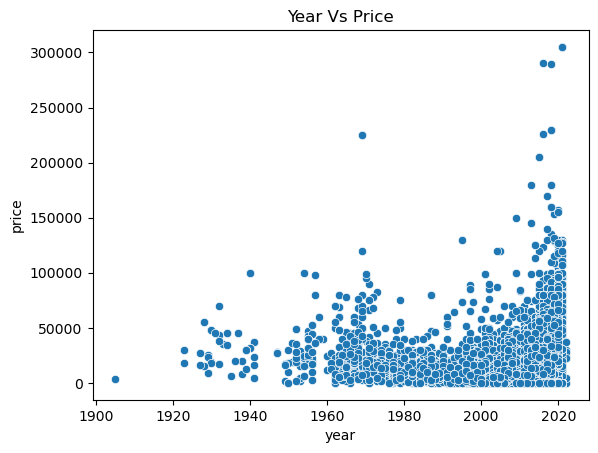

In [1159]:
sns.scatterplot(data=used_cars_clean_transformed, x='remainder__year', y='remainder__price')
plt.xlabel("year")
plt.ylabel("price")
plt.title("Year Vs Price")
plt.savefig("images/year_price_scat.png")

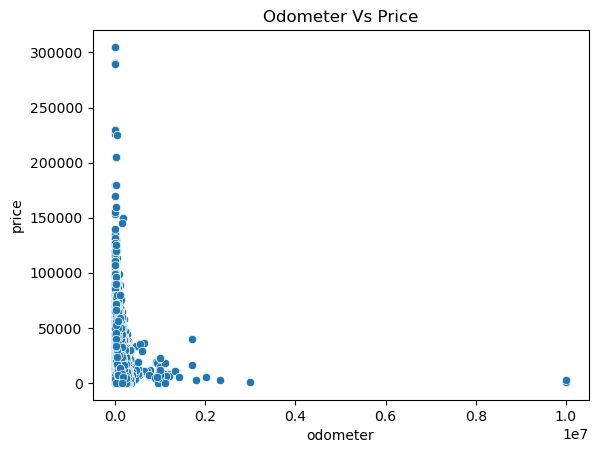

In [1160]:
sns.scatterplot(data=used_cars_clean_transformed, x='remainder__odometer', y='remainder__price')
plt.xlabel("odometer")
plt.ylabel("price")
plt.title("Odometer Vs Price")
plt.savefig("images/odo_price_scat.png")

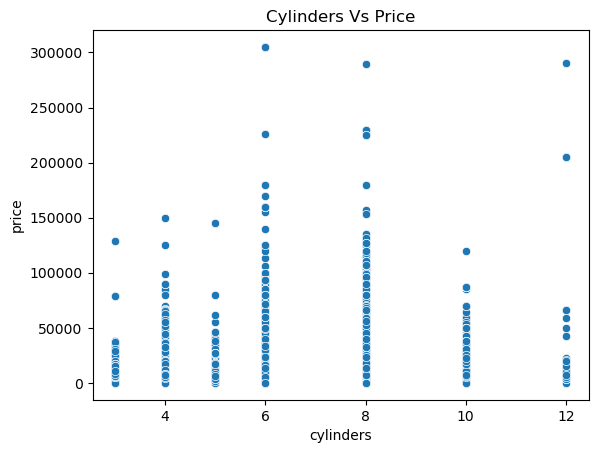

In [1161]:
sns.scatterplot(data=used_cars_clean_transformed, x='remainder__cylinders', y='remainder__price')
plt.xlabel("cylinders")
plt.ylabel("price")
plt.title("Cylinders Vs Price")
plt.savefig("images/cyl_price_scat.png")

#### To summarize, the top features of a vehicle that determine the price are as follows:
#### `Year` , `Odometer`, `Cylinders` , `Fuel`, `Manufacturer`, `Type`, `Transmission`, `Condition`
Manufacturer can break trends and put a high price tag especially if it is a luxury brand like 'Ferrari'.
The title status does not seem to affect the price as much if the condition is good. The modeling done here gives a fit of about 50%. There is still room for improvement in the next iteration with more cleaner data and better algorithms.